Stance slasification social media comment on misuse strobo using indoBERTweet

In [ ]:
import torch

torch.cuda.is_available()

True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset comment
df = pd.read_csv('Dataset_labeled.csv')

In [ ]:
df

,text,label
0,padahal uda disindir banyak disosmed kyk gini ...,0
1,pejabat kalo mau ga kena macet harusnya berang...,0
2,"wat wut wat wut, giliran ambulan kritis cmn di...",0
3,Buru buru amat kaya kerjanya bener aja,0
4,Yang parah lg motor harley klo udah konvoi itu...,0
...,...,...
3011,Muak dengan suara tot tot tot...,0
3012,bukannya udah bener itu?\npolisinya ngawal jen...,0
3013,Yg boleh bunyi2 Gitu HANYA AMBULAN dan PEMADAM...,0
3014,*SE-7..T.O.T..T.O.T..WUK.WUK*\n*DI TIADAKAN..P...,1


# Exploratiory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3006 non-null   object
 1   label   3016 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.3+ KB


In [ ]:
df.isnull().sum()

,0
text,10
label,0


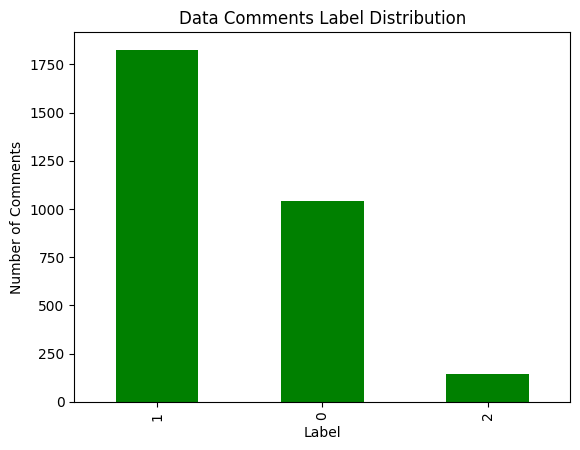

label
1    1826
0    1044
2     146
Name: count, dtype: int64


In [ ]:
label_counts = df['label'].value_counts()

plt.figure()
label_counts.plot(kind='bar', color='#009b97')
plt.title("Data Comments Label Distribution")
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.show()

# Persentase
label_percentage = label_counts
print(label_percentage)


In [ ]:
# Hitung panjang komentar (jumlah kata)
df['comment_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print(df['comment_length'].describe())

count    3016.000000
mean       12.786141
std        12.205361
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       159.000000
Name: comment_length, dtype: float64


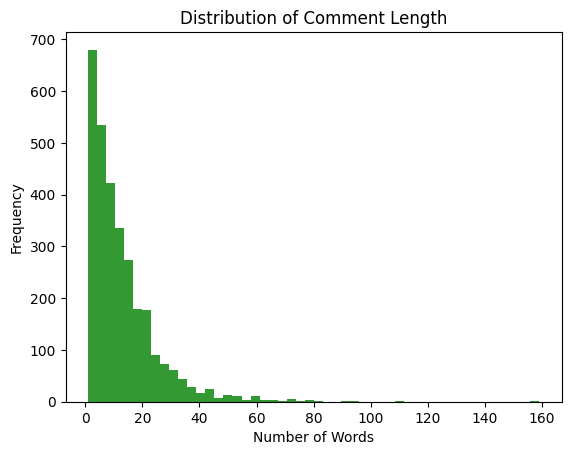

In [ ]:
plt.figure()
plt.hist(df['comment_length'], bins=50, color='green', alpha=0.8)
plt.title("Distribution of Comment Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Rata - rata panjang comment per label
df.groupby('label')['comment_length'].mean()

,comment_length
label,
0,15.483716
1,10.909639
2,16.965753


In [ ]:
# Contoh comment per label
for label in df['label'].unique():
    print(f"\n===== Contoh komentar untuk label: {label} =====")
    samples = df[df['label'] == label]['text'].sample(3, random_state=42)
    for s in samples:
        print("-", s)



===== Contoh komentar untuk label: 0 =====
- ayolah...rakyat punya kekuatan yg berdaulat..tak dimiliki penguasa pejabat aparat,,,untuk apa terlibat perseteruan dgn rakyat?? 
ujung2nya viral, mediasi, minta maaf,,,..
TULI klean? SOMBONG klean?
jika sipil yg salah...dipenjara bonyok dikeroyok
- negara bukan milik golongan dan juga bukan milik per orangan ( rhoma irama )
- heran sama mobil²pejabat ini!!
kerja aja ga bener,di jalan merasa sipaling bisa kerja😂🤪

===== Contoh komentar untuk label: 1 =====
- Statement dari bang Fitra ini saya rasa sudah cukup mewakili kami sebagai masyarakat yaa dan cukup bijaksana juga ketika bang Fitra mengatakan bahwa kita sebagai masyarakat tetap perlu memprioritaskan para petugas keselamatan seperti PJR yg sedang bertugas dengan pengawalan tertentu seperti Escorting Mega Transporter (truk yg membawa muatan sangat besar) dan sebagainya.
Kami jelas mengapresiasi langkah polri yg membekukan penggunaan strobo sirine atau rotator. Bravo, semoga kedepannya le

frequency kata yang muncul

In [ ]:
from collections import Counter

def get_top_words(text_series, n=10):
    text_series = text_series.dropna().astype(str)
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

In [ ]:
for label in df['label'].unique():
    print(f"\nTop words for {label}:")
    print(get_top_words(df[df['label'] == label]['text']))



Top words for 0:
[('yg', 298), ('di', 241), ('dan', 239), ('jalan', 171), ('ada', 155), ('tot', 153), ('mau', 136), ('yang', 136), ('aja', 133), ('itu', 120)]

Top words for 1:
[('di', 384), ('yg', 302), ('tot', 213), ('dan', 204), ('pejabat', 165), ('ada', 162), ('jalan', 155), ('wuk', 147), ('aja', 144), ('rakyat', 136)]

Top words for 2:
[('yg', 56), ('ada', 32), ('jalan', 29), ('bayar', 28), ('di', 28), ('yang', 28), ('juga', 25), ('mau', 23), ('dan', 22), ('punya', 21)]


# Data Preprocessing

In [ ]:
# Hapus nilai nan
df = df.dropna(subset=["text", "label"]).copy()

In [ ]:
df.isna().sum()

,0
text,0
label,0
comment_length,0


Cleaning data (lowercase, remove symbol)

In [ ]:
df["clean_text"] = df["text"].astype(str).str.lower()
df["clean_text"] = df["clean_text"].str.replace(r"http\S+|www\S+", "", regex=True)
df["clean_text"] = df["clean_text"].str.replace(r"@\w+", "", regex=True)
df["clean_text"] = df["clean_text"].str.replace("#", "", regex=False)
df["clean_text"] = df["clean_text"].str.replace(r"\s+", " ", regex=True).str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3006 entries, 0 to 3015
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            3006 non-null   object
 1   label           3006 non-null   int64 
 2   comment_length  3006 non-null   int64 
 3   clean_text      3006 non-null   object
dtypes: int64(2), object(2)
memory usage: 117.4+ KB


In [ ]:
df

,text,label,comment_length,clean_text
0,padahal uda disindir banyak disosmed kyk gini ...,0,15,padahal uda disindir banyak disosmed kyk gini ...
1,pejabat kalo mau ga kena macet harusnya berang...,0,10,pejabat kalo mau ga kena macet harusnya berang...
2,"wat wut wat wut, giliran ambulan kritis cmn di...",0,20,"wat wut wat wut, giliran ambulan kritis cmn di..."
3,Buru buru amat kaya kerjanya bener aja,0,7,buru buru amat kaya kerjanya bener aja
4,Yang parah lg motor harley klo udah konvoi itu...,0,18,yang parah lg motor harley klo udah konvoi itu...
...,...,...,...,...
3011,Muak dengan suara tot tot tot...,0,6,muak dengan suara tot tot tot...
3012,bukannya udah bener itu?\npolisinya ngawal jen...,0,9,bukannya udah bener itu? polisinya ngawal jena...
3013,Yg boleh bunyi2 Gitu HANYA AMBULAN dan PEMADAM...,0,9,yg boleh bunyi2 gitu hanya ambulan dan pemadam...
3014,*SE-7..T.O.T..T.O.T..WUK.WUK*\n*DI TIADAKAN..P...,1,6,*se-7..t.o.t..t.o.t..wuk.wuk* *di tiadakan..pe...


# Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df['clean_text'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label'].tolist()
)


In [ ]:
X_train[:5]

['setuju 1000% gw sebel esmosi lagi macet2 denger tutut plot plot kalo mau ngerasain keluh kesah rakyat antri macet, kecuali ambulan damkar ri1 monggo kasih jalan. krn pernah sy ga kasih jalan helm saya di tabok sama yg kawal minggir plokkk anjritt ga.',
 'aparat pejabat tidak punya malu',
 'setuju 👍',
 'suara kita rakyat kecil...cuma angin lalu buat mrk bro🥹',
 'susah memang makanya kurikulum harus belajar etika di sd biar tau maluiu']

# Tokenization indoBERTweet

In [ ]:
import torch
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    "indolem/indobertweet-base-uncased"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

Chcek token

In [ ]:
print(train_encodings.keys())

KeysView({'input_ids': tensor([[    3,  5692, 10147,  ...,     0,     0,     0],
        [    3,  4793,  3788,  ...,     0,     0,     0],
        [    3,  5692,     1,  ...,     0,     0,     0],
        ...,
        [    3, 17234,  1485,  ...,     0,     0,     0],
        [    3,  1497,  1485,  ...,     0,     0,     0],
        [    3,  5168, 14869,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])})


In [ ]:
print(train_encodings["input_ids"].shape)

torch.Size([2404, 128])


In [ ]:
val_encodings = tokenizer(
    X_val,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)


Contoh hasil tokenization

In [ ]:
tokens = tokenizer.tokenize(X_train[0])
print(tokens)

['setuju', '1000', '%', 'gw', 'sebel', 'es', '##mo', '##si', 'lagi', 'macet', '##2', 'denger', 'tut', '##ut', 'plot', 'plot', 'kalo', 'mau', 'ngerasain', 'keluh', 'kesah', 'rakyat', 'antri', 'macet', ',', 'kecuali', 'ambulan', 'dam', '##kar', 'ri', '##1', 'monggo', 'kasih', 'jalan', '.', 'krn', 'pernah', 'sy', 'ga', 'kasih', 'jalan', 'helm', 'saya', 'di', 'tab', '##ok', 'sama', 'yg', 'kawal', 'minggir', 'pl', '##ok', '##kk', 'anjrit', '##t', 'ga', '.']


# Modeling and training

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


Model

In [ ]:
model_name = "indolem/indobertweet-base-uncased"

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3  # Agree, Neutral, Disagree
)


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dataset for pytorch

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels)  # convert list ke tensor

    def __getitem__(self, idx):
        # Ambil semua tensor di idx yang sama
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
train_dataset = SentimentDataset(train_encodings, y_train)
val_dataset = SentimentDataset(val_encodings, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=False)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=False)


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    logging_steps=50,
    save_total_limit=2,
    report_to=[],
    disable_tqdm=False
)


Metriks

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),
        "precision": precision_score(labels, predictions, average="weighted"),
        "recall": recall_score(labels, predictions, average="weighted")
    }


Trainer

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


Fine-tuning / training

In [ ]:
trainer.train()


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Step,Training Loss
50,0.776100
100,0.746200
150,0.715600
200,0.575900
250,0.553500
300,0.584700
350,0.357300
400,0.371900
450,0.411000
500,0.191100


TrainOutput(global_step=1510, training_loss=0.2267768082338453, metrics={'train_runtime': 560.6552, 'train_samples_per_second': 42.878, 'train_steps_per_second': 2.693, 'total_flos': 1581311640545280.0, 'train_loss': 0.2267768082338453, 'epoch': 10.0})

Evaluasi

In [ ]:
predictions = trainer.predict(val_dataset)

y_pred = predictions.predictions.argmax(axis=1)
y_true = predictions.label_ids

In [ ]:
results = trainer.evaluate()
print(results)

{'eval_loss': 1.74479341506958, 'eval_accuracy': 0.7375415282392026, 'eval_f1': 0.7265938408211041, 'eval_precision': 0.7188865886878983, 'eval_recall': 0.7375415282392026, 'eval_runtime': 4.4499, 'eval_samples_per_second': 135.284, 'eval_steps_per_second': 8.54, 'epoch': 10.0}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, cohen_kappa_score

accuracy = accuracy_score(y_true, y_pred)
macro_f1 = f1_score(y_true, y_pred, average="macro")
kappa = cohen_kappa_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)


In [ ]:
print("IndoBERTweet")
print(f"Accuracy: {accuracy}")
print(f"Macro F1: {macro_f1}")
print(f"Cohen Kappa: {kappa}")
print("Confusion Matrix:\n", cm)


IndoBERTweet
Accuracy: 0.7375415282392026
Macro F1: 0.5263194299226278
Cohen Kappa: 0.4683019268716704
Confusion Matrix:
 [[139  67   3]
 [ 55 303   6]
 [ 12  15   2]]


# Save model

In [ ]:
model.save_pretrained("./indobertweet-strobe")
tokenizer.save_pretrained("./indobertweet-strobe")


('./indobertweet-strobe/tokenizer_config.json',
 './indobertweet-strobe/special_tokens_map.json',
 './indobertweet-strobe/vocab.txt',
 './indobertweet-strobe/added_tokens.json',
 './indobertweet-strobe/tokenizer.json')

# Test model

In [ ]:
test_comments = [
    "setuju banget mobil pakai strobo cuma untuk darurat",
    "Bikin macet, nyebelin banget orang pakai strobo sembarangan",
    "Tinggal kasih jalan aja, apa ribetnya"
]


In [ ]:
encodings = tokenizer(
    test_comments,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

encodings = {key: val.to(device) for key, val in encodings.items()}


In [ ]:
with torch.no_grad():
    outputs = model(**encodings)
    preds = torch.argmax(outputs.logits, dim=-1)


In [ ]:
label_map = {0: "Agree", 1: "Neutral", 2: "Disagree"}
predicted_labels = [label_map[p.item()] for p in preds]

for comment, label in zip(test_comments, predicted_labels):
    print(f"Comment: {comment}\nPredicted Label: {label}\n")


Comment: setuju banget mobil pakai strobo cuma untuk darurat
Predicted Label: Neutral

Comment: Bikin macet, nyebelin banget orang pakai strobo sembarangan
Predicted Label: Neutral

Comment: Tinggal kasih jalan aja, apa ribetnya
Predicted Label: Disagree

